## PART 3: MODEL DEVELOPMENT AND EVALUATION

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# packages for checking assumptions
from scipy import stats as stats

# packages for linear regression and validation 
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Now, we are ready to build an initial model that we will iterate on.

We will compare the performance of a linear regression model, decision tree model and random forest model. This will help you understand the implications of model choice and how different models perform against each other.

Let's get started! We will walk though the following steps:

split our data into train and test do data cleaning to fill in any null values test that the assumptions needed for a linear regression model hold true run a linear regression model run a decision tree model run a random forest model compare the results of all 3 models.

The code below reduces the dataframe to the feature columns we want to include, creates a copy of this df which is the training array, pulls out the feature that we are trying to predict and stores this as a separate training results array.


Import dataframe to use

In [2]:
APPSDF=pd.read_csv('APPSDF1.csv')
APPSDF

,Unnamed: 0,Unnamed: 0.1,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Last_Updated_Days,Version_begin,Version_end,Fillsize
0,0,0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,NaN,2.246607e+07,0.0,1,2019-03-29,Varies with device,Varies with device,251,Varies with device,Varies with device,NaN
1,1,1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,NaN,2.246607e+07,0.0,1,2019-03-29,Varies with device,Varies with device,251,Varies with device,Varies with device,NaN
2,2,2,Peapod,SHOPPING,3.656329,1967.0,100000.0,1.400000e+06,0.0,1,2018-09-20,5.0 and up,2.2,441,5.0,up,NaN
3,3,3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,NaN,1.600000e+07,0.0,1,2019-03-22,4.2 and up,4.1,258,4.2,up,NaN
4,4,4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000.0,2.246607e+07,NaN,1,2019-04-01,Varies with device,Varies with device,248,Varies with device,Varies with device,NaN
5,5,5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000.0,2.300000e+07,0.0,1,2019-03-29,5.0 and up,7.6,251,5.0,up,NaN
6,6,6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267268,421918.0,NaN,2.246607e+07,0.0,2,2019-03-28,Varies with device,Varies with device,252,Varies with device,Varies with device,NaN
7,7,7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495085,142618.0,NaN,2.246607e+07,0.0,1,2019-03-31,Varies with device,Varies with device,249,Varies with device,Varies with device,NaN
8,8,8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000.0,4.100000e+06,0.0,1,2019-02-10,4.3 and up,2.4,298,4.3,up,NaN
9,9,9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353,67514.0,NaN,2.246607e+07,0.0,1,2019-03-07,Varies with device,Varies with device,273,Varies with device,Varies with device,NaN


In [3]:
# list of features that we think may be interested to include
cols = APPSDF[['Price', 
           'Size', 
           'Last_Updated_Days',
            'Reviews',
           'Installs'
           ]]
# create a copy of the dataframe
APPSDFTRAIN = cols.copy()

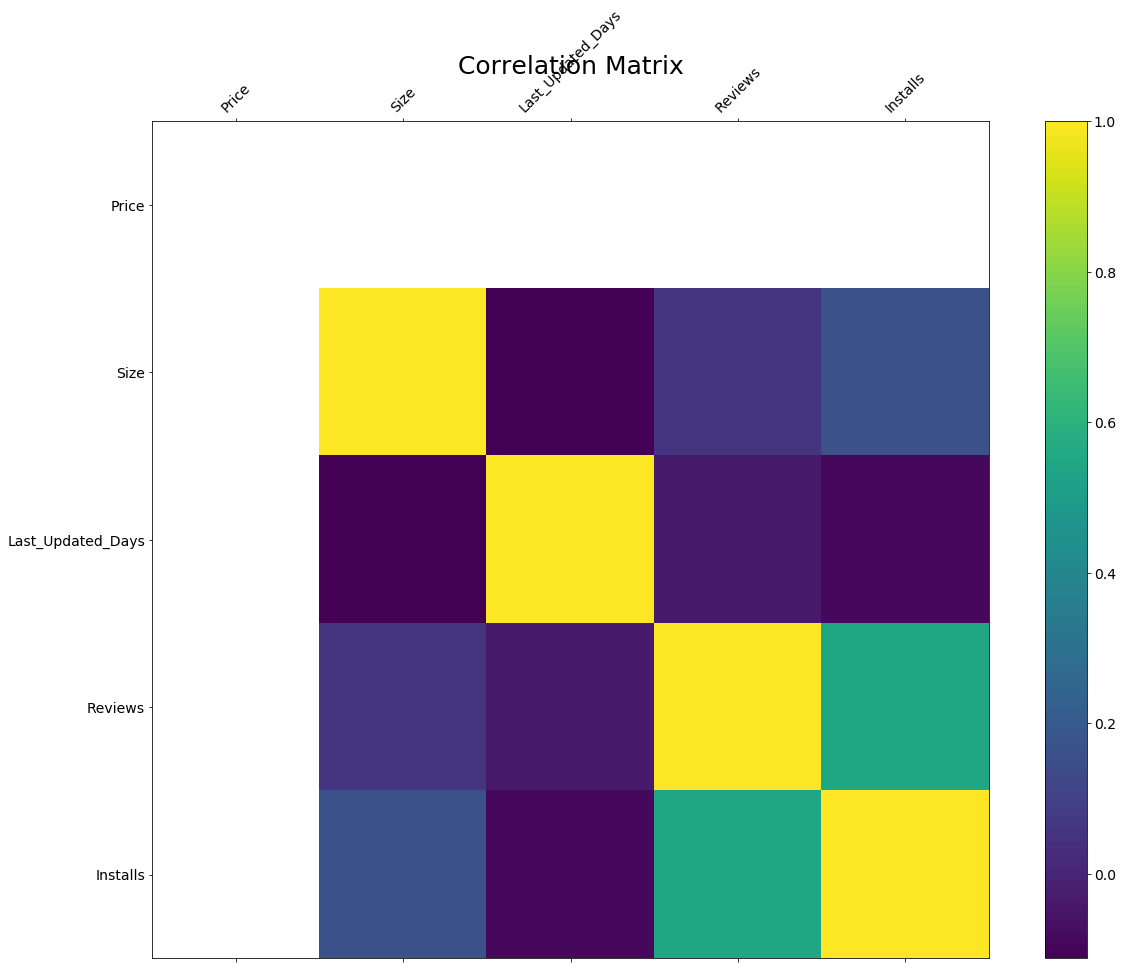

In [4]:
#Showing the Correlation of the variables in the dataframe using a correlation matrix
f = plt.figure(figsize=(20, 15))
plt.matshow(APPSDFTRAIN.corr(), fignum=f.number)
plt.xticks(range(APPSDFTRAIN.shape[1]), APPSDFTRAIN.columns, fontsize=14, rotation=45)
plt.yticks(range(APPSDFTRAIN.shape[1]), APPSDFTRAIN.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25);

## Linear Regression

In [5]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (APPSDFTRAIN.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (APPSDFTRAIN.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Price                2047
Size                    0
Last_Updated_Days       0
Reviews                 0
Installs             4113
dtype: int64

Missing values per row:
0    1
1    1
2    0
3    1
4    1
dtype: int64


In [6]:
APPSDFTRAIN['Installs'].fillna(APPSDFTRAIN['Installs'].mean(), inplace= True)
APPSDFTRAIN['Price'].fillna(APPSDFTRAIN['Price'].mean(), inplace= True)

In [7]:
APPSDFTRAIN['Price']=APPSDFTRAIN['Price'].dropna(axis=0,how='any',inplace= False)
APPSDFTRAIN['Size']=APPSDFTRAIN['Size'].dropna(axis=0, how='any', inplace= False)
APPSDFTRAIN['Reviews']=APPSDFTRAIN['Reviews'].dropna(axis=0, how='any', inplace= False)
APPSDFTRAIN['Installs']=APPSDFTRAIN['Installs'].dropna(axis=0, how='any', inplace= False)


In [8]:
#Preparing the Dataframe
X = APPSDFTRAIN[['Size', 'Reviews', 'Last_Updated_Days',
       'Price']] #x-variables
y = APPSDFTRAIN['Installs']#y-variable

In [9]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we have two separate datasets: train_set and test_set. We will run the regression on train_set using statsmodel's "ols" function since the output is more intuitive. 

In order to get to this, we split the dataframe into 4 different parts. we go over this process below.

X_train, y_train, X_test, y_test
We have already split our initial dataframe into training and test (with 80% in training and 20% in test). However, we additionally need to seperate the explanatory features from our outcome feature.

To do this we need to create four subsets of data:

X_train: the explanatory features to train the algorithm
y_train: the outcome feature associated with the training features - In this case, these are the loan amounts
X_test: the explanatory features to test the algorithm
y_test: the true Y of the target features associated with the testing geatures - again, in this case, these are the loan amounts
To do this we will use the sklearn model selection function train_test_split. If you look back to the top of this page, we imported this function at the beginning of the notebook.

The names used below (X_train, X_test, y_train, y_test) are the conventions for training and testing data so best to try and train yourselves to use them.

In [10]:
#Evaluating Model
model0 = sm.ols(formula="Installs ~ Price", data=APPSDFTRAIN).fit()
print(model0.summary())

C:\Users\Tasha PC\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\Tasha PC\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Mon, 09 Dec 2019   Prob (F-statistic):                nan
Time:                        16:54:47   Log-Likelihood:            -4.5408e+05
No. Observations:               31997   AIC:                         9.082e+05
Df Residuals:                   31996   BIC:                         9.082e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.685e+05   1970.049    136.315      0.0

C:\Users\Tasha PC\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\Users\Tasha PC\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Tasha PC\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Tasha PC\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Multiple Linear Regression

In [11]:
#Evaluating Model
model2 = sm.ols(formula="Installs ~ Price + Size + Last_Updated_Days + Reviews", data=APPSDFTRAIN).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     293.9
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          3.41e-188
Time:                        16:54:48   Log-Likelihood:            -4.5365e+05
No. Observations:               31997   AIC:                         9.073e+05
Df Residuals:                   31993   BIC:                         9.073e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.481e+05   3839.93

In [12]:
print ("GFT + Wiki / GT  R-squared", model0.rsquared)

('GFT + Wiki / GT  R-squared', -1.1102230246251565e-15)


Analyzing the output of our multivariate regression

In [13]:
print(stats.skew(APPSDFTRAIN[(APPSDFTRAIN['Installs'] == 1)].Reviews, axis=None))

4.36435780185


In [14]:
# Linear Regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model1 = regr.fit(X_train, y_train)
print(model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


 First, let's take a look at the predicted value of y, and the true y.

In [27]:
#predicted y: 
predicted_y = regr.predict(X_test)

#Let's calculate the difference! 
y_diff = abs(y_test - predicted_y)
y_diff[:1]

5841    215954.866387
Name: Installs, dtype: float64

Mean Absolute Error

The mean absolute error is calculated as the mean of the distance between predicted and true Y. We take the absolute value of (predicted Y - true Y) so we capture the concept of distance for each observation. Then we take the mean over all observations to get a sense of the entire model. The closer the final statistic is to 0, the better.

In [20]:
print("Mean absolute error: %.2f"
     % np.mean(y_diff))

Mean absolute error: 280217.96


Root Mean Squared Error

The root mean squared error is calculated as the square root of the mean of the difference between predicted and true Y squared. This is a little more complicated to interpret than the MAE, but a useful indication of fit. Like the MAE, the closer this final statistic is to 0, the better.

In [21]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((y_diff) ** 2)))

Root mean squared error: 354536.61


In [15]:
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
linear_training_score = model1.score(X_train, y_train)
linear_testing_score = model1.score(X_test, y_test)
print("Train score: " + str(linear_training_score))
print("Test score: " + str(linear_testing_score))

Train score: 0.02668323690250074
Test score: 0.02686566189142381


In [19]:
#Let's calculate the difference! 
y_diff = abs(y_test - predicted_y)
y_diff[:1]

5841    258547.622005
dtype: float64

How well does our model generalize?

To understand this, we have to score our test set using the weights we just trained. In order to get a true prediction, we can't show our model the test labels. Instead we just ask the model to score based upon the test explanatory variables.

Now let's get back to generalization! We will see how well our model scores unseen (test) data.

We are able to generate some exciting new metrics using our test_set that we created earlier on in the code. First, let's take a look at the predicted value of y, and the true y.

Training dataset: Plotting Predicted Against Actual

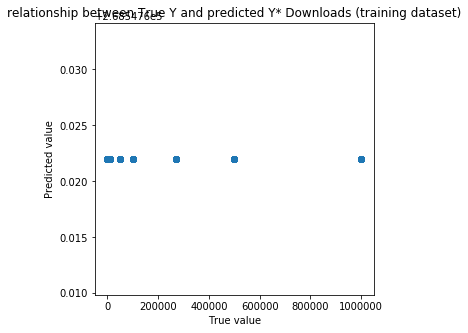

In [22]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
linear_y_predicted_train = model0.predict(X_train)
fig = plt.figure(figsize=(5, 5))
plt.scatter(y_train, linear_y_predicted_train, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Downloads (training dataset)")
plt.show()

Test dataset: Plotting Predicted Against Actual

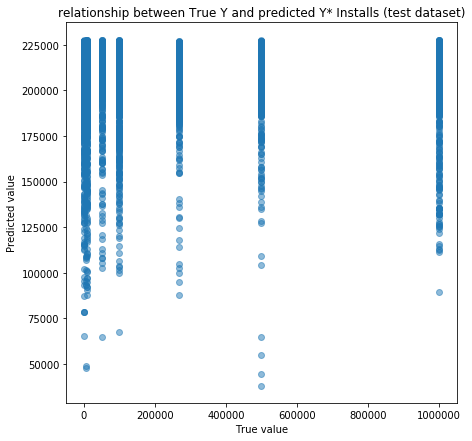

In [37]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
linear_y_predicted_test = model1.predict(X_test)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, linear_y_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Installs (test dataset)")
plt.show()

NB:Clearly,a linear model is not the best choice for modelling our data.Let's move on to the next:

## Random Forests

One of the advantages of the RandomForest algorithms is that we can pass through a whole range of features, regardless of whether we believe there is a linear relationship between the target (Installs) and the feature and then find out which features have the highest influence.The RandomForest Algorithms are based on the concept of decision trees where the set of all possible values are split into non-overlapping groups.

This can be really powerful tool as it requires less initial investigation and analysis than a regression analysis.

In [25]:
# Step 1: Initiating bagging regressor algorithm
rf_regressor = RandomForestRegressor(n_estimators=100, oob_score=True)
# Step 2: Training the bagging regressor algorithm
rf_regressor.fit(X_train,y_train)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
print_scores(rf_regressor, X_train, y_train, X_test, y_test, oob_score=True)

Train score: 0.9358985310635884
Test score: 0.5432539282125737
OOB score: 0.5361961774339608


Mean squared error between the predicted and true Installs: 57398974979 


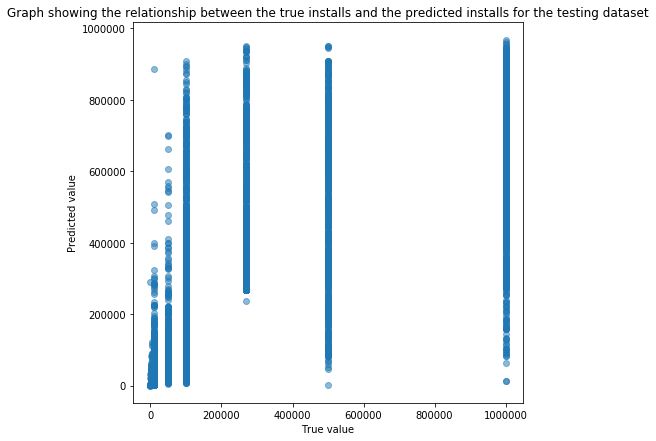

In [34]:
rf_y_predicted_test = rf_regressor.predict(X_test)
print("Mean squared error between the predicted and true Installs: %d " % round(mean_squared_error(y_test, rf_y_predicted_test)))

fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_y_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("Graph showing the relationship between the true installs and the predicted installs for the testing dataset")
plt.show()

## Decision Trees

In [28]:
from sklearn.tree import DecisionTreeRegressor
# Step 1: Initiating the DecisionTreeRegressor algorithm
decision_regressor = DecisionTreeRegressor(random_state=0)
# Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
decision_regressor.fit(X_train, y_train)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
dt_training_score = decision_regressor.score(X_train, y_train)
dt_testing_score = decision_regressor.score(X_test, y_test)
print("Train score: " + str(dt_training_score))
print("Test score: " + str(dt_testing_score))

Train score: 0.9999134951363001
Test score: 0.19619903117305582


From the scores above (the R^2 of the regression between true and predicted loan amounts), we can see that the decision tree works very well on the training dataset, as expected. However, when applied to the testing dataset, it performs much worse. 

The R^2 number above are pretty telling but it is always nice to visualise how these look in a scattor plot. This allows us to visualise the variation between the predicted loan amount and the true loan amount values. 

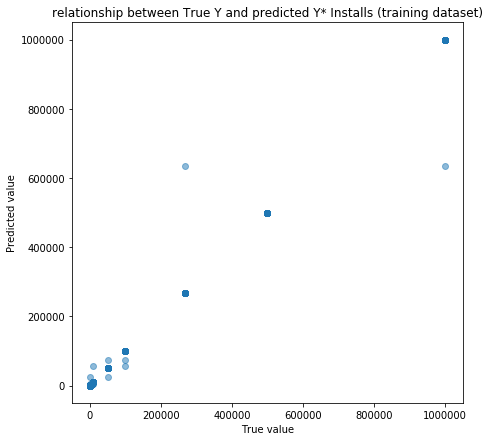

In [36]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
dt_y_predicted_train = decision_regressor.predict(X_train)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_train, dt_y_predicted_train, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Installs (training dataset)")
plt.show()

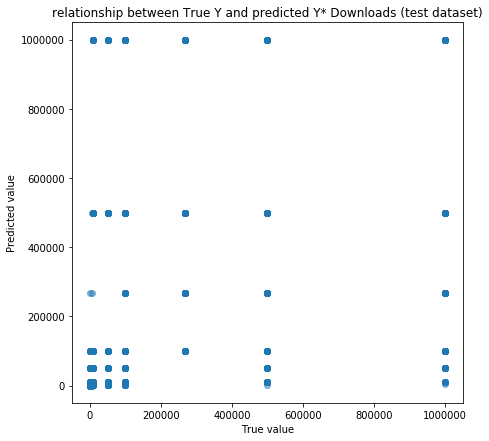

In [38]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
dt_y_predicted_test = decision_regressor.predict(X_test)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, dt_y_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Downloads (test dataset)")
plt.show()

The decison tree regressor is near perfect on the training data; however, much worse on the test data. This is largely due to the likelihood an individual trees of overfitting to the data. Remember overfitting can occur when the tree goes too deep, the minimum leaf sample if too small or the maximum number number of terminal nodes is too high. We can mitigate the impact of overfitting by tuning and optimising these hyperparameters. However, often it is very time consuming and difficult to find the optimal hyperparameters and therefore we look towards ensemble approaches for an easier, more general solution.

Bagging

Another approach to overcome this is to build a collection of trees with sklearn's BaggingRegressor. A bagging regressor builds some specified number of trees and trains each tree with a random subset of the data and then averages the forecast of each individual tree.

This is an Ensemble approach where we use the results of several random analyses to find an average response. For each tree, there will be a sample of data which was not used to train the algorithm. This means that we can also measure the out-of-bag score ( or oob_score). This score calculates the error rate of the predictions on the sample not used while training an individual tree. (Remember a random ~2/3 of data are used to train a given tree).

In [31]:
from sklearn.ensemble import BaggingRegressor
# Step 1: Initiating the bagging regressor algorithm
bagging_regressor = BaggingRegressor(oob_score=True)
# Step 2: Training the bagging regressor algorithm
bagging_regressor.fit(X_train, y_train)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
br_training_score = bagging_regressor.score(X_train, y_train)
br_testing_score = bagging_regressor.score(X_test, y_test)
br_oob_score = bagging_regressor.oob_score_
print("Train score: " + str(br_training_score))
print("Test score: " + str(br_testing_score))
print("Oob score: " + str(br_oob_score))

Train score: 0.9156084658446273
Test score: 0.5073717389642847
Oob score: 0.41101788456134714


C:\Users\Tasha PC\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:1009: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


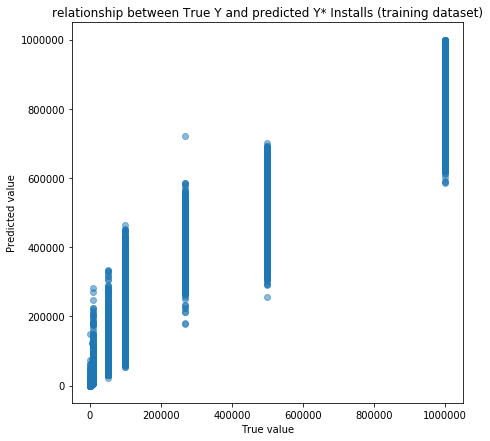

In [39]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
br_predicted_train = bagging_regressor.predict(X_train)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_train, br_predicted_train, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Installs (training dataset)")
plt.show()

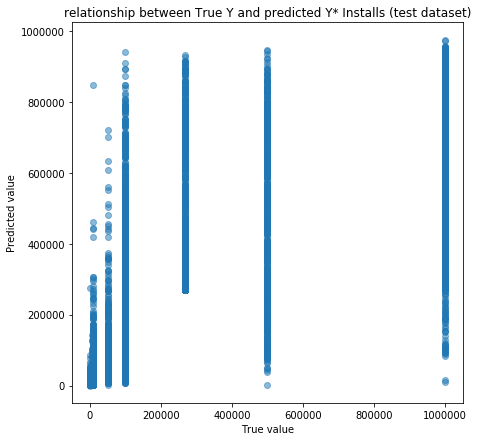

In [40]:
# plotting a grpah of the true values vs the predicted values for the training and test datasets
br_predicted_test = bagging_regressor.predict(X_test)
fig = plt.figure(figsize=(7, 7))
plt.scatter(y_test, br_predicted_test, alpha=0.5)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title("relationship between True Y and predicted Y* Installs (test dataset)")
plt.show()